In [10]:
#!install_package_python3.sh remove scikit-learn
#!install_package_python3.sh add scikit-learn
#!install_package_python3.sh add  imbalanced-learn
#!install_package_python3.sh add  threadpoolctl
#!install_package_python3.sh add pydotplus
#!install_package_python3.sh add six

Updating dependencies
Resolving dependencies... (4.7s)Resolving dependencies... (3.2s)Resolving dependencies... (4.0s)

Writing lock file


Package operations: 1 install, 0 updates, 1 removal

  - Installing wheel (0.35.1)
  - Removing scikit-learn (0.18.1)


In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1. Import model data and check missing data, feature correlation etc

In [7]:
df = pd.read_csv('creditcard_t.csv')

In [8]:
df.shape

(84807, 31)

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,...,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000,84807.000000
mean,38581.959673,-0.262839,-0.039465,0.678863,0.163825,-0.277675,0.094775,-0.111841,0.053913,-0.020025,...,-0.029145,-0.105529,-0.037849,0.008794,0.133741,0.026214,0.001527,0.001955,98.403557,0.002405
std,15628.190360,1.880359,1.671837,1.368737,1.363831,1.376329,1.303629,1.239126,1.224672,1.135724,...,0.732949,0.635332,0.627630,0.595111,0.441004,0.497151,0.389879,0.328873,268.751306,0.048987
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,31533.000000,-1.025353,-0.603074,0.184474,-0.722489,-0.896920,-0.643768,-0.603571,-0.140741,-0.690347,...,-0.223707,-0.524652,-0.178298,-0.322577,-0.130486,-0.326348,-0.063429,-0.005919,7.680000,0.000000
50%,41092.000000,-0.257764,0.069888,0.762844,0.186825,-0.311771,-0.154845,-0.072505,0.070007,-0.096141,...,-0.057716,-0.080607,-0.050009,0.064430,0.171913,-0.072750,0.009312,0.022936,26.990000,0.000000
75%,50795.000000,1.153103,0.724403,1.391255,1.042554,0.257611,0.488497,0.416654,0.352501,0.604597,...,0.118297,0.309740,0.080637,0.405825,0.421344,0.306341,0.082449,0.076060,89.900000,0.000000
max,60468.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [11]:
df['Class'].value_counts()

0    84603
1      204
Name: Class, dtype: int64

In [13]:
df[['Time','Amount','Class']].groupby('Class').describe()

Time                                                                 \
         count          mean           std    min       25%      50%      75%   
Class                                                                           
0      84603.0  38592.677730  15625.028577    0.0  31549.00  41095.0  50802.0   
1        204.0  34136.960784  16331.645384  406.0  20421.25  36668.5  45670.0   

                 Amount                                                   \
           max    count        mean         std  min   25%    50%    75%   
Class                                                                      
0      60468.0  84603.0   98.394917  268.841131  0.0  7.69  27.00  89.80   
1      60353.0    204.0  101.986814  229.008970  0.0  1.00   7.55  99.99   

                 
            max  
Class            
0      19656.53  
1       1809.68

In [15]:
## Check correlation matrix
corrmat = df[['V1','V2','V3']].corr()
corrmat

,V1,V2,V3
V1,1.000000,0.060745,0.246633
V2,0.060745,1.000000,-0.096922
V3,0.246633,-0.096922,1.000000


In [8]:
#Removing irrelevant columns/features
fraud_df=df.drop(['Time'], axis=1)

In [17]:
fraud_df.columns

Index([u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9', u'V10',
       u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18', u'V19',
       u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27', u'V28',
       u'Amount', u'Class'],
      dtype='object')

In [18]:
## Check missing data
fraud_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 2. Preprocessing the data

In [9]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
fraud_df['norm_amount'] = StandardScaler().fit_transform(fraud_df['Amount'].values.reshape(-1,1))

In [20]:
fraud_df[['norm_amount','Amount']][0:5]

,norm_amount,Amount
0,0.190573,149.62
1,-0.356144,2.69
2,1.042816,378.66
3,0.093382,123.50
4,-0.105725,69.99


In [10]:
fraud_df = fraud_df.drop(['Amount'], axis=1)

In [22]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84807 entries, 0 to 84806
Data columns (total 30 columns):
V1             84807 non-null float64
V2             84807 non-null float64
V3             84807 non-null float64
V4             84807 non-null float64
V5             84807 non-null float64
V6             84807 non-null float64
V7             84807 non-null float64
V8             84807 non-null float64
V9             84807 non-null float64
V10            84807 non-null float64
V11            84807 non-null float64
V12            84807 non-null float64
V13            84807 non-null float64
V14            84807 non-null float64
V15            84807 non-null float64
V16            84807 non-null float64
V17            84807 non-null float64
V18            84807 non-null float64
V19            84807 non-null float64
V20            84807 non-null float64
V21            84807 non-null float64
V22            84807 non-null float64
V23            84807 non-null float64
V24            84

In [11]:
## Features and target creations
X = fraud_df.drop(['Class'], axis=1)
y = fraud_df[['Class']]

In [12]:
# splitting dataset to train & test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59364, 29)
(25443, 29)
(59364, 1)
(25443, 1)


## 3. Model training and performance metrics

In [32]:
## Building decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def decision_tree_classification(X_train, y_train, X_test, y_test):
    dt_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=10)
    
    dt_classifier.fit(X_train, y_train.values.ravel())
    
    acc_score = dt_classifier.score(X_test, y_test)
    print("Accuracy of model on test dataset:", acc_score)  
    # print(f"Accuracy of model on test dataset : {acc_score}")
    
    # predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    
    # confusion matrix
    print("\n confusion_matrix on test data:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n classification report for f1-score:")
    print(classification_report(y_test, y_pred))
    
    print("AUC score of test data:", roc_auc_score(y_test, y_pred))

# calling decision_tree_classification method to train and evaluate model
decision_tree_classification(X_train, y_train, X_test, y_test)

Accuracy of model on test dataset: 0.999371143340015

 confusion_matrix on test data:
[[25374     3]
 [   13    53]]

 classification report for f1-score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25377
           1       0.95      0.80      0.87        66

    accuracy                           1.00     25443
   macro avg       0.97      0.90      0.93     25443
weighted avg       1.00      1.00      1.00     25443

AUC score of test data: 0.901456042873468


### Undersampling good population

In [33]:
fraud=len(fraud_df[fraud_df.Class == 1])
fraud

204

In [34]:
## Equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = fraud_df[fraud_df.Class == 0].index
fraud_indices = np.array(fraud_df[fraud_df['Class'] == 1].index)


# take random samples from non fraudulent that are 3 times to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, 3*fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)


## Undersampling techniques

# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = fraud_df.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

In [35]:
# calling decision_tree_classification method to train and evaluate model
decision_tree_classification(X_train_sample, y_train_sample, X_test_sample, y_test_sample)

Accuracy of model on test dataset: 0.9573170731707317

 confusion_matrix on test data:
[[126   2]
 [  5  31]]

 classification report for f1-score:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       128
           1       0.94      0.86      0.90        36

    accuracy                           0.96       164
   macro avg       0.95      0.92      0.94       164
weighted avg       0.96      0.96      0.96       164

AUC score of test data: 0.9227430555555556


In [36]:
dt_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=4, min_samples_leaf=10)
    
dt_classifier.fit(X_train_sample, y_train_sample.values.ravel())

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=100)

## Feature Importance

In [37]:
importances = dt_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
shortind=sorted_indices[0:10]
shortind

array([13, 10, 11, 22, 14, 28, 23, 26,  1,  2])

<AxesSubplot:>

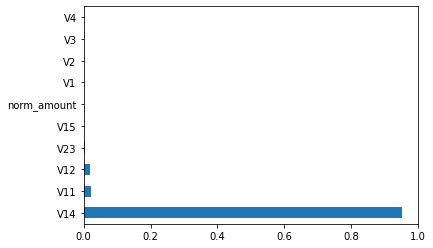

In [38]:
(pd.Series(dt_classifier.feature_importances_, index=X_train_sample.columns)
   .nlargest(10)
   .plot(kind='barh'))  

## 4. Visualizing Decision Trees

In [3]:
#!install_package_python3.sh add pydotplus
#import pydotplus 

In [6]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
#import graphviz

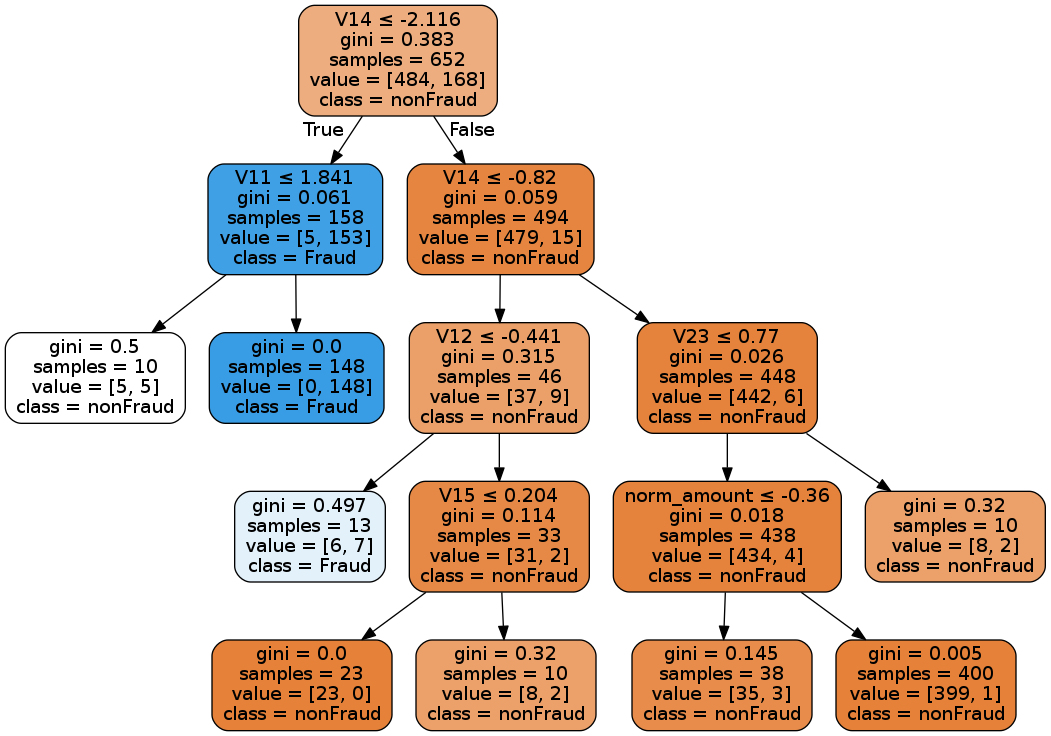

In [39]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data  = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  #DecsTreeModel
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns , class_names=['nonFraud','Fraud'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')

In [40]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

r = export_text(dt_classifier, feature_names=(list(X_train_sample.columns)))
print(r) 

|--- V14 <= -2.12
|   |--- V11 <= 1.84
|   |   |--- class: 0
|   |--- V11 >  1.84
|   |   |--- class: 1
|--- V14 >  -2.12
|   |--- V14 <= -0.82
|   |   |--- V12 <= -0.44
|   |   |   |--- class: 1
|   |   |--- V12 >  -0.44
|   |   |   |--- V15 <= 0.20
|   |   |   |   |--- class: 0
|   |   |   |--- V15 >  0.20
|   |   |   |   |--- class: 0
|   |--- V14 >  -0.82
|   |   |--- V23 <= 0.77
|   |   |   |--- norm_amount <= -0.36
|   |   |   |   |--- class: 0
|   |   |   |--- norm_amount >  -0.36
|   |   |   |   |--- class: 0
|   |   |--- V23 >  0.77
|   |   |   |--- class: 0

